# CP2 - 스포츠

### import 정리

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm
import keras 
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Load

In [ ]:
df_reserv = pd.read_csv('/content/drive/MyDrive/CP2/reserve_ticket_.csv')
df_member = pd.read_csv('/content/drive/MyDrive/CP2/membership.csv')
df_sv_comp = pd.read_csv('/content/drive/MyDrive/CP2/survey_complete_.csv')
df_sv_item = pd.read_csv('/content/drive/MyDrive/CP2/survey_item.csv')
df_sv_main = pd.read_csv('/content/drive/MyDrive/CP2/survey_main.csv')
df_sv_result = pd.read_csv('/content/drive/MyDrive/CP2/survey_result.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/CP2/2022_-_2022.csv')
df_ticket = pd.read_csv('/content/drive/MyDrive/CP2/reserve_ticket_2022.csv')
df_rank = pd.read_csv('/content/drive/MyDrive/CP2/rank.csv')

In [ ]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_date  328 non-null    object
 1   rank       328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


 홈 인천

In [ ]:
df_inc = df_2022[df_2022.home_team_name == '인천']
df_inc = df_inc.reset_index(drop=True)
df_inc = df_inc[['game_date','yoil','game_type_name','audience']]
df_inc.game_date.values
# df_inc

array(['2022/02/19', '2022/02/26', '2022/03/05', '2022/03/13',
       '2022/04/02', '2022/04/10', '2022/05/08', '2022/05/17',
       '2022/05/29', '2022/06/22', '2022/07/06', '2022/08/03',
       '2022/08/13', '2022/08/27', '2022/09/02', '2022/09/14',
       '2022/10/01', '2022/10/11', '2022/10/16'], dtype=object)

In [ ]:
Weather = pd.DataFrame({'game_date':['2022/02/19', '2022/02/26', '2022/03/05', '2022/03/13',
       '2022/04/02', '2022/04/10', '2022/05/08', '2022/05/17',
       '2022/05/29', '2022/06/22', '2022/07/06', '2022/08/03',
       '2022/08/13', '2022/08/27', '2022/09/02', '2022/09/14',
       '2022/10/01', '2022/10/11', '2022/10/16'],
       'weather' : ['snow', 'rain', 'yellow dust', 'rain', 'fog', 'clean', 'rain', 'fog', 'fog', 'fog', 'rain', 'rain', 
                    'rain', 'rain', 'clean', 'rain', 'fog', 'rain', 'fog']})
df_inc = pd.merge(df_inc,Weather, on ='game_date', how = 'left')
df_inc.game_date = df_inc.game_date.str.replace('/','-') # 병합해야할 티켓 데이터는 /가 아닌 -로 구분
# df_inc.info()

In [ ]:
df_member.head(2)
df_member.isna().sum()

MB_IDX             0
MB_AGE             0
zipcode          232
job             2629
favorite_idx       0
dtype: int64

In [ ]:
df_sv_comp['start_date'] = pd.to_datetime(df_sv_comp['start_date'])
df_sv_comp['end_date'] = pd.to_datetime(df_sv_comp['end_date'])
# df_sv_comp.info()

In [ ]:
df_merge = pd.merge(df_member, df_sv_comp, on = 'MB_IDX', how = 'outer')

In [ ]:
# df_merge.head(2)

In [ ]:
df_merge = df_merge[df_merge.columns[:10]]

In [ ]:
df_merge.state = df_merge.state.fillna('N')
# df_merge = df_merge.fillna(0)

In [ ]:
df_merge.columns =['MB_IDX', 'MB_AGE', 'zipcode', 'job', 'favorite_idx', 'idx',
       'survey_idx', 'state', 'start_date', 'end_date']

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19431 entries, 0 to 19430
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MB_IDX        19431 non-null  int64         
 1   MB_AGE        19431 non-null  int64         
 2   zipcode       19198 non-null  float64       
 3   job           16630 non-null  object        
 4   favorite_idx  19431 non-null  object        
 5   idx           5802 non-null   float64       
 6   survey_idx    5802 non-null   float64       
 7   state         19431 non-null  object        
 8   start_date    5802 non-null   datetime64[ns]
 9   end_date      5802 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [ ]:
df_merge.to_csv("df_merge.csv", index = False)

In [ ]:
# df_sv_result

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53921 entries, 0 to 53920
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   reserve_no                 53921 non-null  int64 
 1   membership_no              53921 non-null  int64 
 2   reserve_datetime           48482 non-null  object
 3   cancel_datetime            5439 non-null   object
 4   game_date                  53921 non-null  object
 5   game_time                  53921 non-null  object
 6   match_info                 53921 non-null  object
 7   reserve_state_code         53921 non-null  object
 8   reserve_detail_no          53921 non-null  int64 
 9   ticket_no                  53921 non-null  int64 
 10  product_grade_name         53921 non-null  object
 11  product_denomination_name  53921 non-null  object
 12  seat_Attribute_4           53921 non-null  object
 13  seat_Attribute_5           53762 non-null  object
 14  seat_A

In [ ]:
# reserve, cancel의 nan값 조사
# df_ticket[df_ticket.reserve_datetime.isna()]
# df_ticket[df_ticket.cancel_datetime.isna()].head(2)

In [ ]:
# reserve_state_code 값
df_ticket.reserve_state_code.value_counts()

COMPLETE       44128
ALL_CANCEL      8821
PART_CANCEL      972
Name: reserve_state_code, dtype: int64

Part cancel을 없애고 2개로만 all cancel과 complete으로 나눠야 할까

In [ ]:
df_ticket[df_ticket.reserve_state_code == 'PART_CANCEL'][['reserve_datetime','cancel_datetime','reserve_state_code','cancel_yn','detail_cancel_date_time']].head(2)

,reserve_datetime,cancel_datetime,reserve_state_code,cancel_yn,detail_cancel_date_time
5,NaN,2022-02-19 13:16:32,PART_CANCEL,Y,2022-02-19 13:16:32
6,NaN,2022-02-19 13:16:32,PART_CANCEL,Y,2022-02-19 13:16:32


In [ ]:
# df_ticket[df_ticket.reserve_state_code == 'PART_CANCEL'][['reserve_datetime','cancel_datetime','reserve_state_code','cancel_yn','detail_cancel_date_time']].tail(2)

product_denomination_name 이게 왜 44가지나

In [ ]:
# df_ticket.product_denomination_name.value_counts()

In [ ]:
df_n = df_2022[['game_date','yoil','game_time','home_team_name','away_team_name','audience']]

## 전처리


### ticket 데이터 전처리

In [ ]:
# df_ticket.match_info.value_counts()

In [ ]:
df_ticket.drop(df_ticket[df_ticket.match_info == '[2022 하나원큐 FA CUP] 인천 유나이티드 vs 광주FC'].index, inplace=True)
# 리그 데이터에만 집중

In [ ]:
# df_member.drop(df_member[df_member.zipcode.isnull()].index, inplace=True)

In [ ]:
print(df_member.MB_IDX.nunique())
print(df_ticket.membership_no.nunique())
df_member[df_member.MB_IDX == 118329]

15878
7694


,MB_IDX,MB_AGE,zipcode,job,favorite_idx
2137,118329,1993,22837.0,무직,아길라르


멤버쉽 데이터와 티켓데이터 합칠 수 있음

In [ ]:
df_ticket[['split1', 'split2']] = df_ticket.match_info.str.split('vs ',n=1,expand=True)
# df_ticket.head(2)
df_clean = df_ticket[['membership_no', 'reserve_datetime', 'cancel_datetime', 'cancel_yn', 'detail_cancel_date_time', 'game_date', 'game_time', 'split2', 'reserve_state_code', 'reserve_detail_no', 'product_grade_name', 'product_denomination_name', 'seat_Attribute_4', 'seat_Attribute_5',  'seat_Attribute_6']]

In [ ]:
df_clean.rename(columns = {'split2':'Opp'},inplace=True)
df_clean.head(2)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,membership_no,reserve_datetime,cancel_datetime,cancel_yn,detail_cancel_date_time,game_date,game_time,Opp,reserve_state_code,reserve_detail_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6
0,291,NaN,2022-02-15 00:43:44,Y,2022-02-15 00:43:44,2022-02-19,16:30:00,수원 삼성블루윙즈,ALL_CANCEL,1,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),S1구역,C열,24번
1,1073,NaN,2022-02-14 19:44:11,Y,2022-02-14 19:44:11,2022-02-19,16:30:00,수원 삼성블루윙즈,ALL_CANCEL,1,With석,성인,W8구역,G열,11번


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53209 entries, 0 to 53920
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   membership_no              53209 non-null  int64 
 1   reserve_datetime           47886 non-null  object
 2   cancel_datetime            5323 non-null   object
 3   cancel_yn                  53209 non-null  object
 4   detail_cancel_date_time    5323 non-null   object
 5   game_date                  53209 non-null  object
 6   game_time                  53209 non-null  object
 7   Opp                        53209 non-null  object
 8   reserve_state_code         53209 non-null  object
 9   reserve_detail_no          53209 non-null  int64 
 10  product_grade_name         53209 non-null  object
 11  product_denomination_name  53209 non-null  object
 12  seat_Attribute_4           53209 non-null  object
 13  seat_Attribute_5           53050 non-null  object
 14  seat_A

In [ ]:
df_rank.head()

,game_date,rank
0,2019-03-02,4
1,2019-03-03,5
2,2019-03-09,3
3,2019-03-10,5
4,2019-03-16,5


In [ ]:
df_clean = pd.merge(df_clean,df_rank, on ='game_date', how = 'left')

In [ ]:
# df_clean.head(2)

In [ ]:
df_clean[['split1', 'split2']] = df_clean.reserve_datetime.str.split(' ',n=1,expand=True)
df_clean.rename(columns = {'split1':'reserve_date','split2':'reserve_hour'},inplace=True)

In [ ]:
# df_clean.tail(2)

In [ ]:
df_clean['reserve_date']= pd.to_datetime(df_clean['reserve_date'])
df_clean['reserve_hour']= pd.to_datetime(df_clean['reserve_hour'])
df_clean['reserve_hour'] = df_clean['reserve_hour'].dt.hour

In [ ]:
# df_clean.head(2)

In [ ]:
# df_clean[df_clean.product_grade_name == '원정석'].seat_Attribute_4.value_counts()

In [ ]:
# df_clean.info()

In [ ]:
df_clean[['split1', 'split2']] = df_clean.cancel_datetime.str.split(' ',n=1,expand=True)
df_clean.rename(columns = {'split1':'cancel_date','split2':'cancel_hour'},inplace=True)
df_clean['cancel_date']= pd.to_datetime(df_clean['cancel_date'])
df_clean['cancel_hour']= pd.to_datetime(df_clean['cancel_hour'])
df_clean['cancel_hour'] = df_clean['cancel_hour'].dt.hour

In [ ]:
# df_clean.info()

In [ ]:
# df_clean.info()

In [ ]:
# df_sv_comp['end_date'] = pd.to_datetime(df_sv_comp['end_date'])

In [ ]:
df_Y = df_clean[df_clean.cancel_yn == 'Y']
df_N = df_clean[df_clean.cancel_yn == 'N']
df_Y = df_Y[['membership_no', 'reserve_state_code', 'reserve_datetime', 'cancel_datetime', 'cancel_yn', 'Opp','game_date', 'game_time', 'reserve_detail_no', 'product_grade_name', 'product_denomination_name', 'seat_Attribute_4', 'seat_Attribute_5',  'seat_Attribute_6', 'reserve_date', 'reserve_hour', 'cancel_date', 'cancel_hour', 'rank']]
df_N = df_N[['membership_no', 'reserve_state_code', 'reserve_datetime', 'cancel_datetime', 'cancel_yn', 'Opp','game_date', 'game_time', 'reserve_detail_no', 'product_grade_name', 'product_denomination_name', 'seat_Attribute_4', 'seat_Attribute_5',  'seat_Attribute_6', 'reserve_date', 'reserve_hour', 'cancel_date', 'cancel_hour', 'rank']]

cancel했다는데 예약날짜가 있는게 있고 안했는데 캔슬날짜가 있는게 있다 -> 이상치??

In [ ]:
# df_N[df_N.reserve_datetime.isna()]
# 캔슬안했는데 캔슬 시간정보가 있는경우

In [ ]:
# df_clean[(df_clean.cancel_yn == 'N') & (df_clean.reserve_datetime.isna())].cancel_yn.replace('N', 'Y')
ind = df_clean[(df_clean.cancel_yn == 'N') & (df_clean.reserve_datetime.isna())].cancel_yn.index
df_clean.cancel_yn[ind] = df_clean.cancel_yn[ind].replace('N', 'Y')

<ipython-input-47-4c7ea468718f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.cancel_yn[ind] = df_clean.cancel_yn[ind].replace('N', 'Y')


In [ ]:
# df_Y[df_Y.cancel_datetime.isna()] 
# 캔슬했는데 캔슬 시간정보가 없는경우

In [ ]:
ind = df_clean[(df_clean.cancel_yn == 'Y') & (df_clean.cancel_datetime.isna())].cancel_yn.index
df_clean.cancel_yn[ind] = df_clean.cancel_yn[ind].replace('Y', 'N')

<ipython-input-49-6a4870c416f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.cancel_yn[ind] = df_clean.cancel_yn[ind].replace('Y', 'N')


In [ ]:
df_Y = df_clean[df_clean.cancel_yn == 'Y']
df_N = df_clean[df_clean.cancel_yn == 'N']
df_Y = df_Y[['membership_no', 'cancel_yn', 'Opp', 'game_date', 'game_time', 'reserve_detail_no', 'product_grade_name', 'product_denomination_name', 'cancel_date', 'cancel_hour', 'rank']]
df_N = df_N[['membership_no', 'cancel_yn', 'Opp', 'game_date', 'game_time', 'reserve_detail_no', 'product_grade_name', 'product_denomination_name', 'reserve_date', 'reserve_hour', 'rank']]

In [ ]:
# df_Y.info()
# df_Y.nunique()

In [ ]:
df_N.product_grade_name.unique()

array(['World class석', 'S석', 'Exciting석', 'With석', '프리미엄 클래식', '스카이라운지',
       '하이네켄 테이블석(2인)', '1인 테이블석(SG2)', 'Expert석', '1인 테이블석(EG4)', 'N석',
       '1인 테이블석(EG1)', '프리미엄 골드', '원정석', '피크닉 테이블석(2인)', 'Wide view석',
       '서비푸드 테이블석(EG4)', '서비푸드 테이블석(SG2)', '서비푸드 테이블석(EG1)',
       '1인 테이블석EG4)'], dtype=object)

티켓 데이터로 EDA 뭘 할 수 있을까? 

멤버쉽 넘버로 비율을 확인

 캔슬 유무로 모델 하나 feat = 좌석,  상대 팀, 좋아하는 선수, 직업, 나이(멤버쉽 데이터 병합 필요)

 상대팀에 따라 캔슬 비율 체크, 좌석 비율 체크

 게임 시간에 따라 비율 체크

 좌석에 따라 직업, 좋아하는 선수, 나이 체크

 생각해보니 원정석은 원정팀을 위한 곳인데 왜 멤버쉽 예매데이터에 존재하는가? -> 어느팀에도 속하지 않고 축구만 보러온 사람들? or 되팔려고?

In [ ]:
df_YN = pd.concat([df_Y,df_N])

In [ ]:
df_YN = pd.merge(df_YN,df_inc, on ='game_date', how = 'left')

In [ ]:
df_YN = df_YN[['membership_no', 'cancel_yn', 'Opp', 'product_grade_name', 'product_denomination_name','reserve_detail_no', 'yoil', 'game_type_name',	'audience',	'weather', 'rank']]

In [ ]:
df_YN = pd.merge(df_YN, df_member, left_on = 'membership_no', right_on = 'MB_IDX')
df_YN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53209 entries, 0 to 53208
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   membership_no              53209 non-null  int64  
 1   cancel_yn                  53209 non-null  object 
 2   Opp                        53209 non-null  object 
 3   product_grade_name         53209 non-null  object 
 4   product_denomination_name  53209 non-null  object 
 5   reserve_detail_no          53209 non-null  int64  
 6   yoil                       53209 non-null  object 
 7   game_type_name             53209 non-null  object 
 8   audience                   53209 non-null  int64  
 9   weather                    53209 non-null  object 
 10  rank                       53209 non-null  int64  
 11  MB_IDX                     53209 non-null  int64  
 12  MB_AGE                     53209 non-null  int64  
 13  zipcode                    53133 non-null  flo

In [ ]:
df_YN.drop(df_YN[df_YN.zipcode.isnull()].index, inplace=True)

In [ ]:
# df_YN[['Opp','product_grade_name','product_denomination_name','MB_AGE','job','favorite_idx','cancel_yn']].head(2)

In [ ]:
df_YN.product_denomination_name.value_counts()

성인                         21775
청소년/어린이                    12223
예매권북                        5847
일반                          3027
5천원 멤버십 할인권 (성인)            1773
포스코 건설 예매권                  1516
셀트리온 예매권                    1168
K리그 축덕카드(신용)                1040
K리그 축덕카드(체크)                 904
게임권                          602
문화누리카드(성인)                   438
5천원 멤버십 할인권 (일반)             379
3,000포인트 할인 쿠폰(성인)           370
ㅅㅇ전 게임권                      366
5,000포인트 할인 쿠폰(성인)           341
성인/청소년/어린이                   339
5천원 멤버십 할인권(청소년/어린이)         263
N회 방문자 할인쿠폰                  183
3,000포인트 할인 쿠폰(청소년/어린이)      146
K리그 PASS                      95
5,000포인트 할인 쿠폰(청소년/어린이)       93
3,000포인트 할인 쿠폰(일반)            60
1인 테이블석 할인권                   49
5,000포인트 할인 쿠폰(일반)            43
1,000포인트 할인 쿠폰(성인)            28
청소년                           23
1,000포인트 할인 쿠폰(청소년/어린이)       12
어린이                            8
1인 테이블석 50% 할인쿠폰               5
롯데백화점 30% 할인쿠폰(성인)             5
1,000포인트 할

할인을 받는지 안받는지로 범주 변경

In [ ]:
df_YN.loc[(df_YN['product_denomination_name'] == '성인') | (df_YN['product_denomination_name'] == '청소년/어린이')
| (df_YN['product_denomination_name'] == '일반') | (df_YN['product_denomination_name'] == '성인/청소년/어린이')
| (df_YN['product_denomination_name'] == '청소년') | (df_YN['product_denomination_name'] == '어린이'), 'Sale'] = 'N'

df_YN.loc[df_YN['Sale'].isna(), 'Sale'] = 'Y'

In [ ]:
df_YN.Sale.value_counts()

N    37395
Y    15738
Name: Sale, dtype: int64

In [ ]:
df_YN.cancel_yn.value_counts()

N    47812
Y     5321
Name: cancel_yn, dtype: int64

In [ ]:
df_YN = df_YN[['membership_no', 'Opp','product_grade_name','reserve_detail_no','Sale','MB_AGE','job','favorite_idx','cancel_yn', 'yoil', 'game_type_name',	'audience',	'weather', 'rank']]

In [ ]:
df_Tab_YN = df_YN
df_Tab_Y = df_Y
df_Tab_N = df_N

In [ ]:
# 인천 경기 관중수 날씨 등등 추가

## 캔슬 유무 이진 분류 모델

In [ ]:
df_YN[(df_YN['membership_no'] == 291) & (df_YN['Opp'] == '전북 현대모터스')]

,membership_no,Opp,product_grade_name,reserve_detail_no,Sale,MB_AGE,job,favorite_idx,cancel_yn,yoil,game_type_name,audience,weather,rank
3,291,전북 현대모터스,S석,1,N,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,7597,rain,4
4,291,전북 현대모터스,S석,2,N,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,7597,rain,4
5,291,전북 현대모터스,S석,3,Y,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,7597,rain,4
6,291,전북 현대모터스,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,7597,rain,4
26,291,전북 현대모터스,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,토,스플릿일반,6339,rain,4
27,291,전북 현대모터스,S석,2,N,1992,회사원(사무직/연구직),김보섭,N,토,스플릿일반,6339,rain,4
28,291,전북 현대모터스,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,토,스플릿일반,6339,rain,4


In [ ]:
# print("중복된 데이터의 비율", df_YN.duplicated(subset=['membership_no', 'Opp']).sum()/len(df_YN))
# df_YN.drop_duplicates(subset=['membership_no', 'Opp'], keep='last', inplace=True)
df_YN.shape

(53133, 14)

In [ ]:
y =  df_YN['cancel_yn']
print("타겟데이터의 비율\n",y.value_counts(normalize=True))

타겟데이터의 비율
 N    0.899855
Y    0.100145
Name: cancel_yn, dtype: float64


In [ ]:
df_j = df_YN

In [ ]:
df_YN = df_YN[['Opp','product_grade_name','reserve_detail_no','Sale','MB_AGE','job','favorite_idx', 'yoil', 'game_type_name',	'audience',	'weather', 'rank', 'cancel_yn']]
df_YN.cancel_yn = df_YN.cancel_yn.replace('Y',1)
df_YN.cancel_yn = df_YN.cancel_yn.replace('N',0)
df_YN.head(2)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Opp,product_grade_name,reserve_detail_no,Sale,MB_AGE,job,favorite_idx,yoil,game_type_name,audience,weather,rank,cancel_yn
0,수원 삼성블루윙즈,1인 테이블석(SG2),1,Y,1992,회사원(사무직/연구직),김보섭,토,스플릿일반,5382,snow,2,1
1,김천상무프로축구단,S석,1,Y,1992,회사원(사무직/연구직),김보섭,일,스플릿일반,2607,rain,3,0


In [ ]:
data_x = df_YN.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = df_YN["cancel_yn"]
print("Shape of Y:", data_y.shape)

Shape of X: (53133, 12)
Shape of Y: (53133,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

평가 지표 - 실제로 캔슬을 할 사람과 안할 사람을 구분하는 것이 중요하기에 Recall

이진 분류이기에 ROC-AUC

### DecisionTreeClassifier

In [ ]:
pipe_DC = make_pipeline(OrdinalEncoder(),
                        StandardScaler(),
                        SimpleImputer(strategy='most_frequent'),  
                        DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42,
                                               class_weight = 'balanced'))
pipe_DC.fit(X_train, y_train)
test_pred = pipe_DC.predict(X_test)

print(classification_report(y_test,test_pred))
print("AUC: ", roc_auc_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.63      0.77      9563
           1       0.21      0.89      0.34      1064

    accuracy                           0.65     10627
   macro avg       0.60      0.76      0.55     10627
weighted avg       0.90      0.65      0.72     10627

AUC:  0.7602422282308301


<BarContainer object of 12 artists>

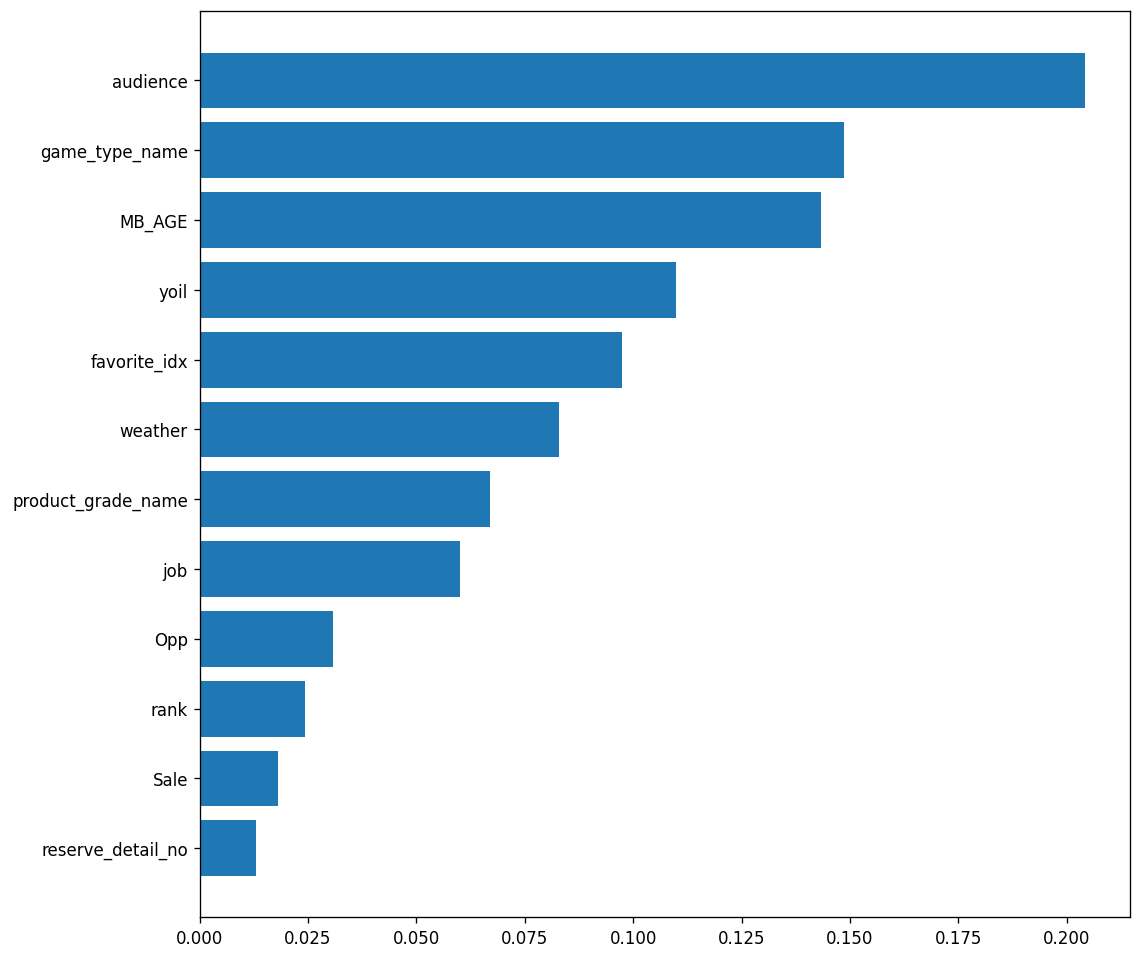

In [ ]:
feature_importances = list(
    zip(X_train.columns, pipe_DC.named_steps["decisiontreeclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))

precision(0.9) 실제 캔슬x, 캔슬x로 예측한 확률

recall(0.05) 실제 캔슬o, 캔슬o 예측한 확률 

In [ ]:
# params = {
#     'decisiontreeclassifier__max_depth': [2,4,6], 
#     'decisiontreeclassifier__max_features': [6, 10],
#     'decisiontreeclassifier__min_samples_leaf': [6, 8, 12],
# }

# grid_dc = GridSearchCV(pipe_DC, param_grid=params, scoring="roc_auc", cv=2, verbose=3)
# grid_dc.fit(X_train, y_train)
# # grid_dc.get_params().keys()

In [ ]:
# test_pred = grid_dc.predict(X_test)

# print(classification_report(y_test,test_pred))
# print("AUC: ", roc_auc_score(y_test,test_pred))

### RandomForest

In [ ]:
pipe_RF = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="most_frequent"),
    RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        class_weight = 'balanced'
    ),
)

In [ ]:
pipe_RF.fit(X_train, y_train)
test_pred = pipe_RF.predict(X_test)

print(classification_report(y_test,test_pred))
print("AUC: ", roc_auc_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9563
           1       0.48      0.35      0.41      1064

    accuracy                           0.90     10627
   macro avg       0.71      0.66      0.68     10627
weighted avg       0.89      0.90      0.89     10627

AUC:  0.6554117962479135


### XGBClassifier 모델

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="most_frequent"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False,
    ),
)
print(pipe)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='error', n_estimators=200, n_jobs=-1,
                               random_state=42, use_label_encoder=False))])


In [ ]:
params = {
    "xgbclassifier__max_depth": [2, 4, 6],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

In [ ]:

grid_search = GridSearchCV(pipe, param_grid=params, scoring="roc_auc", cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.802 total time=   2.2s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.795 total time=   1.4s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.786 total time=   1.4s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.802 total time=   1.4s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.794 total time=   1.4s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.786 total time=   1.4s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('standardscaler', StandardScaler()),
                                       ('simpleimputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('xgbclassifier',
                                        XGBClassifier(eval_metric='error',
                                                      n_estimators=200,
                                                      n_jobs=-1,
                                                      random_state=42,
                                                      use_label_encoder=False))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__max_depth': [2, 4, 6],
                         'xgbclassifier__min_child_weight': [2, 4, 8]},
             scoring='roc_auc', verbose=3)

In [ ]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 AUC: ", grid_search.best_score_)
estimator = grid_search.best_estimator_

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__max_depth': 6, 'xgbclassifier__min_child_weight': 2}
최적 AUC:  0.8508138588392624


In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Opp', 'product_grade_name', 'Sale',
                                      'job', 'favorite_idx', 'yoil',
                                      'game_type_name', 'weather'],
                                mapping=[{'col': 'Opp', 'data_type': dtype('O'),
                                          'mapping': 제주 유나이티드      1
울산 현대축구단      2
수원 삼성블루윙즈     3
강원FC          4
전북 현대모터스      5
FC서울          6
수원FC          7
포항 스틸러스       8
대구FC          9
성남FC         10
김천상무프로축구단    11
NaN          -2
dtype: int64},
                                         {'col': 'product_grade_name',
                                          'data_type': dtype('O'),
                                          'map...
                                          'mapping': 스플릿일반    1
파이널A     2
NaN     -2
dtype: int64},
                                         {'col': 'weather',
                                          'data_type': dtype('O

<BarContainer object of 12 artists>

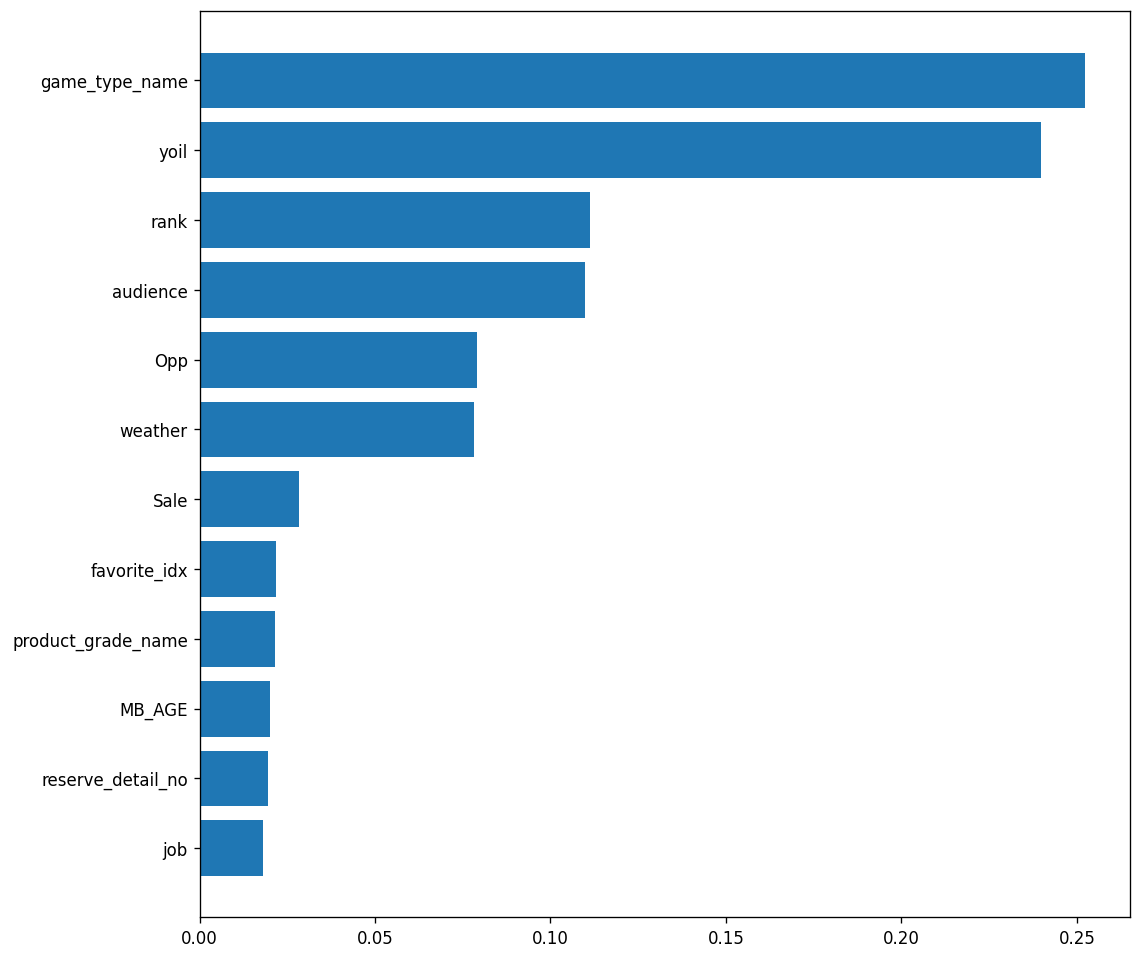

In [ ]:
feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))

In [ ]:
def calculate_score(pipe, X_test, y_test):
    test_accuracy = pipe.score(X_test, y_test)
    test_f1 = f1_score(y_test, pipe.predict(X_test))
    return test_accuracy, test_f1

In [ ]:

test_pred = grid_search.predict(X_test)

print(classification_report(y_test,test_pred))
print("AUC: ", roc_auc_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9563
           1       0.79      0.10      0.18      1064

    accuracy                           0.91     10627
   macro avg       0.85      0.55      0.57     10627
weighted avg       0.90      0.91      0.87     10627

AUC:  0.5506453935476567


In [ ]:
# test_accuracy, test_f1 = calculate_score(pipe.best_estimator_, X_test, y_test)

In [ ]:
# categorical_columns = ['Opp', 'product_grade_name', 'Sale', 'job', 'favorite_idx', 'yoil', 'game_type_name', 'weather']

# X_train_oh = pd.get_dummies(X_train, columns = categorical_columns) 
# X_test_oh = pd.get_dummies(X_test, columns = categorical_columns) 

### + 2 모델 (GBM, KNN)

In [ ]:
# pipe_svm = make_pipeline(
#     OrdinalEncoder(),
#     StandardScaler(),
#     SimpleImputer(strategy="most_frequent"),
#     SVC(random_state=42 , probability = True)
# )

In [ ]:
# pipe_svm.fit(X_train, y_train)
# test_pred = pipe_svm.predict(X_test)

# print(classification_report(y_test,test_pred))
# print("AUC: ", roc_auc_score(y_test,test_pred))

In [ ]:
pipe_gbm = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="most_frequent"),
    GBM(n_estimators  = 1000 , random_state = 42)
)

In [ ]:
pipe_gbm.fit(X_train, y_train)
test_pred = pipe_gbm.predict(X_test)

print(classification_report(y_test,test_pred))
print("AUC: ", roc_auc_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9563
           1       0.69      0.08      0.14      1064

    accuracy                           0.90     10627
   macro avg       0.80      0.54      0.55     10627
weighted avg       0.89      0.90      0.87     10627

AUC:  0.537539144840036


In [ ]:
params = {
    'gradientboostingclassifier__n_estimators': [100, 300, 500], 
    'gradientboostingclassifier__max_depth': [6, 10],
    'gradientboostingclassifier__min_samples_leaf': [6, 8, 12],
    'gradientboostingclassifier__min_samples_split': [8, 16],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1]
}

grid_cv = GridSearchCV(pipe_gbm, param_grid=params, scoring="roc_auc", cv=2, verbose=3)
grid_cv.fit(X_train, y_train)
# grid_cv.get_params().keys()

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END gradientboostingclassifier__learning_rate=0.05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__min_samples_leaf=6, gradientboostingclassifier__min_samples_split=8, gradientboostingclassifier__n_estimators=100;, score=0.832 total time=   4.4s
[CV 2/2] END gradientboostingclassifier__learning_rate=0.05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__min_samples_leaf=6, gradientboostingclassifier__min_samples_split=8, gradientboostingclassifier__n_estimators=100;, score=0.819 total time=   3.8s
[CV 1/2] END gradientboostingclassifier__learning_rate=0.05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__min_samples_leaf=6, gradientboostingclassifier__min_samples_split=8, gradientboostingclassifier__n_estimators=300;, score=0.852 total time=  11.2s
[CV 2/2] END gradientboostingclassifier__learning_rate=0.05, gradientboostingclassifier__max_depth=6, gradi

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['Opp',
                                                             'product_grade_name',
                                                             'Sale', 'job',
                                                             'favorite_idx',
                                                             'yoil',
                                                             'game_type_name',
                                                             'weather'],
                                                       mapping=[{'col': 'Opp',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': 제주 유나이티드      1
울산 현대축구단      2
수원 삼성블루윙즈     3
강원FC          4
전북 현대모터스      5
FC서울          6
수원FC          7
포항 스틸러스       8
대구FC          9
성남FC     

In [ ]:
test_pred = grid_cv.predict(X_test)

print(classification_report(y_test,test_pred))
print("AUC: ", roc_auc_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      9563
           1       0.69      0.37      0.48      1064

    accuracy                           0.92     10627
   macro avg       0.81      0.68      0.72     10627
weighted avg       0.91      0.92      0.91     10627

AUC:  0.676209028138683


In [ ]:
pipe_knn = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="most_frequent"),
    KNN()
)

In [ ]:
pipe_knn.fit(X_train, y_train)
test_pred = pipe_knn.predict(X_test)

print(classification_report(y_test,test_pred))
print("AUC: ", roc_auc_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9563
           1       0.42      0.18      0.25      1064

    accuracy                           0.89     10627
   macro avg       0.67      0.57      0.60     10627
weighted avg       0.86      0.89      0.87     10627

AUC:  0.5744387339518933


## 2022년 k리그 일정 데이터 -> 구단 다음 경기 예매 예측 (데이터가 적어 불가능 ?)

In [ ]:
df_n[df_n.home_team_name == '인천'].yoil.value_counts()

토    7
일    5
수    4
화    2
금    1
Name: yoil, dtype: int64

월요일과 목요일 경기 X

In [ ]:
# df_n[df_n.home_team_name == '인천']

## df_N으로 클러스터링

In [ ]:
# df_N.info()
# df_N.nunique()

In [ ]:
# df_N.head(6)

In [ ]:
df_N['game_date'] = pd.to_datetime(df_N['game_date'])
df_N['reserve_date'] = pd.to_datetime(df_N['reserve_date'])
df_N['game_time'] = pd.to_datetime(df_N['game_time'])
df_N['game-reserve']=df_N['game_date'] - df_N['reserve_date']

In [ ]:
df_N['game-reserve'] = df_N['game-reserve'].dt.days
df_N['game_time'] = df_N['game_time'].dt.hour

In [ ]:
# df_N.info()

In [ ]:
# df_N.nunique() 
# game_date와 reserve_date는 game-reserve가 있으니 삭제?
# product_denomination_name = 할인 종류

In [ ]:
# df_N.product_denomination_name.value_counts()

In [ ]:
df_N.head(1)

,membership_no,cancel_yn,Opp,game_date,game_time,reserve_detail_no,product_grade_name,product_denomination_name,reserve_date,reserve_hour,rank,game-reserve
819,102806,N,수원 삼성블루윙즈,2022-02-19,16,1,World class석,K리그 축덕카드(신용),2022-02-14,14.0,2,5


In [ ]:
df_N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47886 entries, 819 to 53208
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   membership_no              47886 non-null  int64         
 1   cancel_yn                  47886 non-null  object        
 2   Opp                        47886 non-null  object        
 3   game_date                  47886 non-null  datetime64[ns]
 4   game_time                  47886 non-null  int64         
 5   reserve_detail_no          47886 non-null  int64         
 6   product_grade_name         47886 non-null  object        
 7   product_denomination_name  47886 non-null  object        
 8   reserve_date               47886 non-null  datetime64[ns]
 9   reserve_hour               47886 non-null  float64       
 10  rank                       47886 non-null  int64         
 11  game-reserve               47886 non-null  int64         
dtypes:

In [ ]:
# Weather = pd.DataFrame({'game_date':['2022/02/19', '2022/02/26', '2022/03/05', '2022/03/13',
#        '2022/04/02', '2022/04/10', '2022/05/08', '2022/05/17',
#        '2022/05/29', '2022/06/22', '2022/07/06', '2022/08/03',
#        '2022/08/13', '2022/08/27', '2022/09/02', '2022/09/14',
#        '2022/10/01', '2022/10/11', '2022/10/16'],
#        'weather' : ['snow', 'rain', 'yellow dust', 'rain', 'fog', 'clean', 'rain', 'fog', 'fog', 'fog', 'rain', 'rain', 
#                     'rain', 'rain', 'clean', 'rain', 'fog', 'rain', 'fog']})

In [ ]:
#원정석은 어림잡아 12000~15000 사이여서 13000으로

In [ ]:
price = pd.DataFrame({'product_grade_name':df_N.product_grade_name.unique(),
                      'grade_price' : [19000, 12000, 13000, 18000, 35000, 35000, 50000, 20000, 12000, 20000,
                                       12000, 20000, 50000, 13000, 45000, 17000, 20000, 20000, 20000, 20000]})

In [ ]:
df_N = pd.merge(df_N, price, on ='product_grade_name', how = 'left')

In [ ]:
df_N.head(2)

,membership_no,cancel_yn,Opp,game_date,game_time,reserve_detail_no,product_grade_name,product_denomination_name,reserve_date,reserve_hour,rank,game-reserve,grade_price
0,102806,N,수원 삼성블루윙즈,2022-02-19,16,1,World class석,K리그 축덕카드(신용),2022-02-14,14.0,2,5,19000
1,138160,N,수원 삼성블루윙즈,2022-02-19,16,1,World class석,성인,2022-02-14,14.0,2,5,19000


In [ ]:
# 1인테이블석 하나로, 서비푸드 테이블석? -> 이것도 1인 테이블석

In [ ]:
df_clust = df_N[['membership_no', 'reserve_detail_no', 'reserve_date', 'grade_price']] # 방문횟수 필요

In [ ]:
df_clust.head(2)

,membership_no,reserve_detail_no,reserve_date,grade_price
0,102806,1,2022-02-14,19000
1,138160,1,2022-02-14,19000


In [ ]:
df_clust_cnt = df_clust.groupby(['membership_no', 'reserve_date'], as_index = False).count()
df_clust_cnt['grade_price'] = df_clust['grade_price']

In [ ]:
df_clust_cnt['amount'] = df_clust_cnt['reserve_detail_no'] * df_clust_cnt['grade_price']
df_clust_cnt

,membership_no,reserve_date,reserve_detail_no,grade_price,amount
0,137,2022-05-28,2,19000,38000
1,153,2022-02-15,1,19000,19000
2,153,2022-02-23,1,19000,19000
3,153,2022-02-28,1,19000,19000
4,153,2022-03-08,1,19000,19000
...,...,...,...,...,...
20817,151972,2022-10-16,4,18000,72000
20818,151978,2022-10-16,1,18000,18000
20819,151980,2022-10-16,1,12000,12000
20820,151981,2022-10-16,2,35000,70000


In [ ]:
## 각 고객별 최근방문일을 알아보자.
recency_df = df_clust_cnt.groupby('membership_no')['reserve_date'].max().reset_index()
recency_df

,membership_no,reserve_date
0,137,2022-05-28
1,153,2022-10-12
2,180,2022-10-13
3,208,2022-10-12
4,291,2022-10-12
...,...,...
7422,151972,2022-10-16
7423,151978,2022-10-16
7424,151980,2022-10-16
7425,151981,2022-10-16


In [ ]:
## 각 고객별 방문횟수를 알아보자.
frequency_df = df_clust_cnt.groupby('membership_no')['reserve_date'].count().reset_index()
frequency_df

,membership_no,reserve_date
0,137,1
1,153,11
2,180,2
3,208,22
4,291,28
...,...,...
7422,151972,1
7423,151978,1
7424,151980,1
7425,151981,1


In [ ]:
# 구매 총합
amount_df = df_clust_cnt.groupby('membership_no')['amount'].sum().reset_index()
amount_df

,membership_no,amount
0,137,38000
1,153,215000
2,180,57000
3,208,443000
4,291,661000
...,...,...
7422,151972,72000
7423,151978,18000
7424,151980,12000
7425,151981,70000


In [ ]:
## 병합
df_clust_merge = pd.merge(recency_df,frequency_df, on ='membership_no', how = 'left')
df_clust_merge = pd.merge(df_clust_merge,amount_df, on ='membership_no', how = 'left')


In [ ]:
df_clust_merge.columns = ['membership_no', 'Recency', 'Frequency', 'Monetary']
df_clust_merge 

,membership_no,Recency,Frequency,Monetary
0,137,2022-05-28,1,38000
1,153,2022-10-12,11,215000
2,180,2022-10-13,2,57000
3,208,2022-10-12,22,443000
4,291,2022-10-12,28,661000
...,...,...,...,...
7422,151972,2022-10-16,1,72000
7423,151978,2022-10-16,1,18000
7424,151980,2022-10-16,1,12000
7425,151981,2022-10-16,1,70000


In [ ]:
df_clust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7427 entries, 0 to 7426
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   membership_no  7427 non-null   int64         
 1   Recency        7427 non-null   datetime64[ns]
 2   Frequency      7427 non-null   int64         
 3   Monetary       7427 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 290.1 KB


In [ ]:
current_day = pd.to_datetime('2022-01-01')
# current_day.
# df_clust_merge.columns
time_diff = df_clust_merge['Recency']-current_day ## 최근방문일과 기준 날짜의 시간 차이

time_in_seconds = [x for x in time_diff] ## 시간 차이를 초단위로 계산
df_clust_merge['Recency'] = time_in_seconds ## 변환된 데이터를 다시 삽입한다.


In [ ]:
df_clust_merge

,membership_no,Recency,Frequency,Monetary
0,137,147 days,1,38000
1,153,284 days,11,215000
2,180,285 days,2,57000
3,208,284 days,22,443000
4,291,284 days,28,661000
...,...,...,...,...
7422,151972,288 days,1,72000
7423,151978,288 days,1,18000
7424,151980,288 days,1,12000
7425,151981,288 days,1,70000


In [ ]:
def get_score(level, data):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue 
    return score
    
def get_rfm_grade(df, num_class, rfm_tick_point, rfm_col_map, suffix=None):
    
    ##### 필요모듈 체크
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing
    
    ##### 파라미터 체크
    if not isinstance(df, pd.DataFrame): ## 데이터는 pd.DataFrame이어야 함.
        print('데이터는 pandas.DataFrame 객체여야 합니다.')
        return
    
    if isinstance(rfm_tick_point, dict) == False or isinstance(rfm_col_map, dict) == False: ## rfm_tick_point와 rfm_col_map은 모두 딕셔너리
        print(f'rfm_tick_point와 rfm_col_map은 모두 딕셔너리여야합니다.')
        return
    
    if len(rfm_col_map) != 3: ## rfm_col_map에는 반드시 3개의 키를 가져아함.
        print(f'rfm_col_map인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if len(rfm_tick_point) != 3: ## rfm_tick_point에는 반드시 3개의 키를 가져아함.
        print(f'rfm_tick_point인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if set(rfm_tick_point.keys()) != set(rfm_col_map.keys()): ## rfm_tick_point와 rfm_col_map은 같은 키를 가져야함.
        print(f'rfm_tick_point와 rfm_col_map은 같은 키를 가져야 합니다.')
        return
    
    if not set(rfm_col_map.values()).issubset(set(df.columns)):
        not_in_df = set(rfm_col_map.values())-set(df.columns)
        print(f'{not_in_df}이 데이터 칼럼에 있어야 합니다.')
        return
    
    for k, v in rfm_tick_point.items():
        if isinstance(v, str):
            if not v in ['quantile','min_max']:
                print(f'{k}의 값은 "quantile" 또는 "min_max"중에 하나여야 합니다.')
                return
        elif isinstance(v,list) or isinstance(v,tuple):
            if len(v) != num_class-1:
                print(f'{k}에 대응하는 리스트(튜플)의 원소는 {num_class-1}개여야 합니다.')
                return
    
    if suffix:
        if not isinstance(suffix, str):
            print('suffix인자는 문자열이어야합니다.')
            return
        
    ##### 최근방문일/방문횟수/구매금액 점수 부여
    for k, v in rfm_tick_point.items():
        if isinstance(v,str):
            if v == 'quantile':
                ## 데이터 변환
                scale = preprocessing.StandardScaler() ## 데이터의 범위 조작하기 쉽게 해주는 클래스 
                temp_data = np.array(df[rfm_col_map[k]]) ## 데이터를 Numpy 배열로 변환
                temp_data = temp_data.reshape((-1,1)) ## scale을 적용하기위해 1차원 배열을 2차원으로 변환
                temp_data = scale.fit_transform(temp_data) ## 데이터를 평균은 0, 표준편차는 1을 갖도록 변환 
                temp_data = temp_data.squeeze() ## 데이터를 다시 1차원으로 변환
 
                ## 분위수 벡터
                quantiles_level = np.linspace(0,1,num_class+1)[1:-1] ## 분위수를 구할 기준값을 지정 0과 1은 제외
                quantiles = [] ## 분위수를 담을 리스트
                for ql in quantiles_level:
                    quantiles.append(np.quantile(temp_data,ql)) ## 분위수를 계산하고 리스트에 삽입
            else: ## min_max인 경우
                ## 데이터 변환
                temp_data = np.array(df[rfm_col_map[k]])
 
                ## 등분점 계산
                quantiles = np.linspace(np.min(temp_data),np.max(temp_data),num_class+1)[1:-1] ## 최소값과 최대값을 점수 개수만큼 등간격으로 분할하는 점
        else: ## 직접 구분값을 넣어주는 경우
            temp_data = np.array(df[rfm_col_map[k]])
            quantiles = v ## 직접 구분값을 넣어줌
        score = get_score(quantiles, temp_data) ## 구분값을 기준으로 점수를 부여하고 리스트로 저장한다.
        new_col_name = rfm_col_map[k]+'_'+k ## 점수값을 담는 변수의 이름
        if suffix:
            new_col_name = rfm_col_map[k]+'_'+suffix
        df[new_col_name] = score ## 기존데이터 옆에 점수 데이터를 추가한다.
    return df

In [ ]:
rfm_tick_point={'R':'quantile','F':'quantile','M':'quantile'}
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}
result = get_rfm_grade(df=df_clust_merge, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result.to_csv('result.csv',index=False)

In [ ]:
result2 = result[['membership_no','Recency_R','Frequency_F','Monetary_M']]

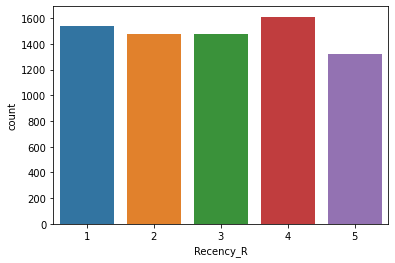

In [ ]:
sns.countplot(x="Recency_R", data=result2)
plt.show()

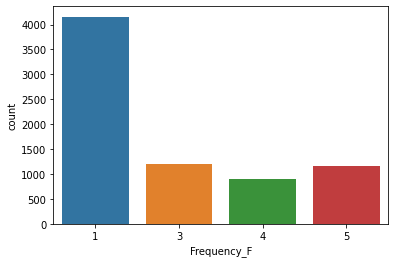

In [ ]:
sns.countplot(x="Frequency_F", data=result2)
plt.show()

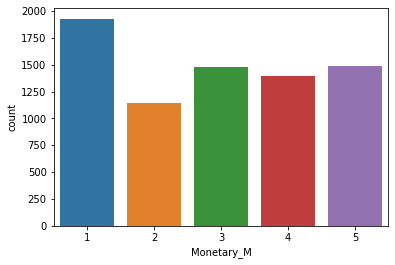

In [ ]:
sns.countplot(x="Monetary_M", data=result2)
plt.show()

In [ ]:
df_N.nunique()

membership_no                7427
cancel_yn                       1
Opp                            11
game_date                      19
game_time                       4
reserve_detail_no              10
product_grade_name             20
product_denomination_name      32
reserve_date                  116
reserve_hour                   24
rank                            4
game-reserve                    9
grade_price                     9
dtype: int64

In [ ]:
result2.describe()

,membership_no,Recency_R,Frequency_F,Monetary_M
count,7427.000000,7427.000000,7427.000000,7427.000000
mean,134908.826444,2.960011,2.315201,2.913828
std,21358.751306,1.398468,1.586330,1.474208
min,137.000000,1.000000,1.000000,1.000000
25%,125997.000000,2.000000,1.000000,1.000000
50%,143545.000000,3.000000,1.000000,3.000000
75%,148347.000000,4.000000,4.000000,4.000000
max,151984.000000,5.000000,5.000000,5.000000


In [ ]:
def get_score2(level, data, reverse = False):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    reverse = 점수가 높을 때 그에 해당하는 값을 낮게 설정하고 싶을 때 True
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 
 
grid_number = 50 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
  
  weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## 클래스 개수
class_level = np.linspace(1,5,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = result['Monetary'].sum() ## 구매금액 총합 = 총 매출

In [ ]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*result['Recency_R'] + \
    w[1]*result['Frequency_F'] + \
    w[2]*result['Monetary_M'] 

    result['Class'] = get_score2(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여

    ## 등급별로 구매금액을 집계한다.
    grouped_result = result.groupby('Class')['Monetary'].sum().reset_index()
        
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_result['Monetary'] = grouped_result['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_result['Monetary'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
      max_std = std_sales ## 표준편차 최대값 업데이트
      optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|██████████| 1326/1326 [01:54<00:00, 11.55it/s]


In [ ]:
score = optimal_weights[0]*result['Recency_R'] + \
        optimal_weights[1]*result['Frequency_F'] + \
        optimal_weights[2]*result['Monetary_M'] ## 고객별 점수 계산
 
result['Class'] = get_score2(class_level,score,True) ## 고객별 등급 부여


In [ ]:
result

,membership_no,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Class
0,137,147 days,1,38000,2,1,2,4
1,153,284 days,11,215000,4,5,5,1
2,180,285 days,2,57000,5,3,3,2
3,208,284 days,22,443000,4,5,5,1
4,291,284 days,28,661000,4,5,5,1
...,...,...,...,...,...,...,...,...
7422,151972,288 days,1,72000,5,1,3,2
7423,151978,288 days,1,18000,5,1,1,4
7424,151980,288 days,1,12000,5,1,1,4
7425,151981,288 days,1,70000,5,1,3,2


In [ ]:
## 클래스별 고객 수 계산
temp_rfm_score1 = result.groupby('Class')['membership_no'].count().reset_index().rename(columns={'membership_no':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = result.groupby('Class')['Monetary'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['Monetary'] = temp_rfm_score2['Monetary'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))

In [ ]:
result_df

,Class,Count,Monetary
0,1,1744,0.633239
1,2,1144,0.142324
2,3,1249,0.097010
3,4,1156,0.060994
4,5,2134,0.066433


In [ ]:
result

,membership_no,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Class
0,137,147 days,1,38000,2,1,2,4
1,153,284 days,11,215000,4,5,5,1
2,180,285 days,2,57000,5,3,3,2
3,208,284 days,22,443000,4,5,5,1
4,291,284 days,28,661000,4,5,5,1
...,...,...,...,...,...,...,...,...
7422,151972,288 days,1,72000,5,1,3,2
7423,151978,288 days,1,18000,5,1,1,4
7424,151980,288 days,1,12000,5,1,1,4
7425,151981,288 days,1,70000,5,1,3,2


## Tableau용 데이터

In [ ]:
df_Tab_YN.head(2)

,membership_no,Opp,product_grade_name,reserve_detail_no,Sale,MB_AGE,job,favorite_idx,cancel_yn,yoil,game_type_name,audience,weather,rank
0,291,수원 삼성블루윙즈,1인 테이블석(SG2),1,Y,1992,회사원(사무직/연구직),김보섭,Y,토,스플릿일반,5382,snow,2
1,291,김천상무프로축구단,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,2607,rain,3


In [ ]:
df_Tab_Y.head(2)

,membership_no,cancel_yn,Opp,game_date,game_time,reserve_detail_no,product_grade_name,product_denomination_name,cancel_date,cancel_hour,rank
0,291,Y,수원 삼성블루윙즈,2022-02-19,16:30:00,1,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),2022-02-15,0.0,2
1,1073,Y,수원 삼성블루윙즈,2022-02-19,16:30:00,1,With석,성인,2022-02-14,19.0,2


In [ ]:
df_Tab_Y['game_date'] = pd.to_datetime(df_Tab_Y['game_date'])
df_Tab_Y['cancel_date'] = pd.to_datetime(df_Tab_Y['cancel_date'])
df_Tab_Y['game_time'] = pd.to_datetime(df_Tab_Y['game_time'])
df_Tab_Y['game-cancel']=df_Tab_Y['game_date'] - df_Tab_Y['cancel_date']
df_Tab_Y['game-cancel'] = df_Tab_Y['game-cancel'].dt.days
df_Tab_Y['game_time'] = df_Tab_Y['game_time'].dt.hour

In [ ]:
df_Tab_N

,membership_no,cancel_yn,Opp,game_date,game_time,reserve_detail_no,product_grade_name,product_denomination_name,reserve_date,reserve_hour,rank,game-reserve
819,102806,N,수원 삼성블루윙즈,2022-02-19,16,1,World class석,K리그 축덕카드(신용),2022-02-14,14.0,2,5
820,138160,N,수원 삼성블루윙즈,2022-02-19,16,1,World class석,성인,2022-02-14,14.0,2,5
821,138160,N,수원 삼성블루윙즈,2022-02-19,16,2,World class석,성인,2022-02-14,14.0,2,5
822,138160,N,수원 삼성블루윙즈,2022-02-19,16,3,World class석,성인,2022-02-14,14.0,2,5
823,104910,N,수원 삼성블루윙즈,2022-02-19,16,1,World class석,ㅅㅇ전 게임권,2022-02-14,14.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
53204,139589,N,포항 스틸러스,2022-10-16,19,2,Exciting석,성인,2022-10-16,19.0,4,0
53205,139589,N,포항 스틸러스,2022-10-16,19,3,Exciting석,청소년/어린이,2022-10-16,19.0,4,0
53206,151984,N,포항 스틸러스,2022-10-16,19,1,원정석,성인,2022-10-16,19.0,4,0
53207,118329,N,포항 스틸러스,2022-10-16,19,1,S석,성인,2022-10-16,19.0,4,0


In [ ]:
df_Tab_YN.to_csv("df_Tab_YN.csv", index = False)
df_Tab_Y.to_csv("df_Tab_Y.csv", index = False)
df_Tab_N.to_csv("df_Tab_N.csv", index = False)

In [ ]:
df_Tab_N['game-reserve'].unique()

array([5, 4, 3, 2, 1, 0, 7, 6, 8])

In [ ]:
df_member[df_member['MB_IDX'] == 151918]

,MB_IDX,MB_AGE,zipcode,job,favorite_idx
15801,151918,1989,16433.0,회사원(사무직/연구직),김보섭


In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15878 entries, 0 to 15877
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MB_IDX        15878 non-null  int64  
 1   MB_AGE        15878 non-null  int64  
 2   zipcode       15646 non-null  float64
 3   job           13249 non-null  object 
 4   favorite_idx  15878 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 620.4+ KB


## 설문


In [ ]:
print(df_sv_comp.shape)
df_sv_comp.head(2)


(5802, 10)


,idx,survey_idx,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,41,24,C,2020-09-03 17:28:21,2020-09-03 17:33:34,1353,1996,22230.0,대학생(대학원생 포함),송시우
1,46,24,C,2020-09-03 17:26:03,2020-09-03 17:29:55,102758,1988,21340.0,회사원(사무직/연구직),김도혁


In [ ]:
print(df_sv_item.shape)
df_sv_item.info()

(1330, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idx          1330 non-null   int64  
 1   survey_idx   1330 non-null   int64  
 2   order_seq    1330 non-null   int64  
 3   subject      1330 non-null   object 
 4   item_type    1330 non-null   object 
 5   item_text    1054 non-null   object 
 6   item_number  1317 non-null   float64
 7   required_yn  1163 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 83.2+ KB


In [ ]:
print(df_sv_main.shape)
df_sv_main.head(2)

(88, 3)


,idx,subject,description
0,24,2021 시즌권 구성 설문조사,인천유나이티드를 응원해 주시기 위해 시즌권을 구매해주신 팬 여러분께 과거 판매된 시...
1,25,3/6 대구전 설문조사 테스트,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...


In [ ]:
print(df_sv_result.shape)
df_sv_result.info()

(94524, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94524 entries, 0 to 94523
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idx                94524 non-null  int64 
 1   survey_target_idx  94524 non-null  int64 
 2   survey_item_idx    94524 non-null  int64 
 3   answer_index       94524 non-null  int64 
 4   answer_content     94510 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.6+ MB


In [ ]:
survey_df = pd.merge(df_sv_result, df_sv_item, left_on = 'survey_item_idx', right_on = 'idx', how = 'left')

In [ ]:
df_sv_item

,idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
0,115,24,1,시즌권 구매 시기,C,2015년 #2016년 #2017년 #2018년 #2019년 #2020년,0.0,Y
1,116,24,2,시즌권 구매 총 매수,T,NaN,10.0,NaN
2,117,24,3,"시즌권 구매시 가장 중요한 점은?(가격, 기념품, 혜택, 충성심 등)",T,NaN,100.0,Y
3,118,24,4,"시즌권 구매시 가장 고려하지 않는 점은?(가격, 기념품, 혜택, 충성심 등)",T,NaN,100.0,Y
4,119,24,5,2020 시즌권 가격의 적정성,M,매우좋음 #좋음 #보통 #나쁨 #매우나쁨,0.0,Y
...,...,...,...,...,...,...,...,...
1325,1634,136,12,오늘 경기장 방문 후 친구나 동료에게 추천할 의향이 얼마나 있으신가요?,M,10점(매우추천) #9점 #8점 #7점 #6점 #5점 #4점 #3점 #2점 #1점 ...,0.0,Y
1326,1635,136,14,인천축구전용경기장을 재방문하신다면 언제 다시 방문하시겠습니까?,M,다음 경기 #다음 달 #특별한 이벤트가 있을 때 #계획 없음,0.0,Y
1327,1636,136,15,팬 여러분들이 더욱 편하게 즐기고 가실 수 있도록 저희가 어떤 점을 개선해 나아가면...,T,NaN,300.0,NaN
1328,1637,136,16,마지막으로 인천유나이티드에 바라는 점이나 하고 싶은 이야기가 있으신가요?,T,NaN,300.0,NaN


In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94524 entries, 0 to 94523
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx_x              94524 non-null  int64  
 1   survey_target_idx  94524 non-null  int64  
 2   survey_item_idx    94524 non-null  int64  
 3   answer_index       94524 non-null  int64  
 4   answer_content     94510 non-null  object 
 5   idx_y              94524 non-null  int64  
 6   survey_idx         94524 non-null  int64  
 7   order_seq          94524 non-null  int64  
 8   subject            94524 non-null  object 
 9   item_type          94524 non-null  object 
 10  item_text          81169 non-null  object 
 11  item_number        93864 non-null  float64
 12  required_yn        87079 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
survey_df = survey_df[['survey_item_idx', 'survey_target_idx', 'answer_index' , 'answer_content', 'survey_idx', 'order_seq', 'subject', 'item_type', 'item_text', 'item_number', 'required_yn']]

In [ ]:
survey_df['survey_item_idx']>70

0        True
1        True
2        True
3        True
4        True
         ... 
94519    True
94520    True
94521    True
94522    True
94523    True
Name: survey_item_idx, Length: 94524, dtype: bool

In [ ]:
sv_ind = survey_df['survey_item_idx'].value_counts() > np.mean(survey_df['survey_item_idx'].value_counts())
sv_ind = sv_ind[sv_ind==True].index

In [ ]:
sv_ind[:10]

Int64Index([115, 159, 538, 637, 149, 622, 1530, 126, 131, 128], dtype='int64')

In [ ]:
np.mean(survey_df['survey_item_idx'].value_counts())

71.55488266464799

In [ ]:
survey_df[survey_df['survey_item_idx'] == 622].answer_content.value_counts()[:5]

구단 SNS(페이스북, 인스타그램 등)     128
구단 문자메시지                   74
인터넷 포털                     62
구단 홈페이지                    61
현수막 광고                     24
Name: answer_content, dtype: int64

In [ ]:

survey_df['survey_item_idx'].value_counts()

115     903
159     561
538     484
637     399
149     394
       ... 
1190      1
1191      1
1194      1
1147      1
1168      1
Name: survey_item_idx, Length: 1321, dtype: int64

In [ ]:
survey_df = survey_df[survey_df['survey_item_idx'].isin(sv_ind[:10])] # 설문 상위 10개
survey_df.to_csv("survey_df.csv", index = False)

### 추가 해야할일? (사용X)

동반인원 ( 표 한번에 구매하는 최대 수 ) 체크

팀순위 피쳐에 추가

In [ ]:
# df_j

In [ ]:
# df_jo =  df_N.groupby(['membership_no', 'reserve_date'], as_index = False).count()
df_jo = df_j.groupby(['membership_no', 'Opp'], as_index = False)['reserve_detail_no'].count()

In [ ]:
df_jo = pd.merge(df_j, df_jo, on = ['membership_no', 'Opp', 'reserve_detail_no'])

In [ ]:
df_jo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   membership_no       12741 non-null  int64 
 1   Opp                 12741 non-null  object
 2   product_grade_name  12741 non-null  object
 3   reserve_detail_no   12741 non-null  int64 
 4   Sale                12741 non-null  object
 5   MB_AGE              12741 non-null  int64 
 6   job                 11180 non-null  object
 7   favorite_idx        12741 non-null  object
 8   cancel_yn           12741 non-null  object
 9   yoil                12741 non-null  object
 10  game_type_name      12741 non-null  object
 11  audience            12741 non-null  int64 
 12  weather             12741 non-null  object
 13  rank                12741 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.5+ MB


In [ ]:
df_jo.head(2)

,membership_no,Opp,product_grade_name,reserve_detail_no,Sale,MB_AGE,job,favorite_idx,cancel_yn,yoil,game_type_name,audience,weather,rank
0,291,수원 삼성블루윙즈,1인 테이블석(SG2),1,Y,1992,회사원(사무직/연구직),김보섭,Y,토,스플릿일반,5382,snow,2
1,291,김천상무프로축구단,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,2607,rain,3


In [ ]:
merge = result[['membership_no','Class']]
df_jo = pd.merge(df_jo,merge,on = 'membership_no', how = 'left')

In [ ]:
df_jo.head(2)

,membership_no,Opp,product_grade_name,reserve_detail_no,Sale,MB_AGE,job,favorite_idx,cancel_yn,yoil,game_type_name,audience,weather,rank,Class
0,291,수원 삼성블루윙즈,1인 테이블석(SG2),1,Y,1992,회사원(사무직/연구직),김보섭,Y,토,스플릿일반,5382,snow,2,1.0
1,291,김천상무프로축구단,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,2607,rain,3,1.0


In [ ]:
df_jo.to_csv("df_jo.csv", index = False)

클래스별 차별 프로ㅓ모션? 몇명 같이 예약하는지, 직업에 따라 나뉘는지?  상위클래스만 집중? 아니면 하위 클래스를? 중간은 버려야하나

In [ ]:
df_jo[df_jo['Class']==1].reserve_detail_no.value_counts()

2     2336
1     1352
3      864
4      590
5      126
6       67
10      41
8       22
7       20
9        6
Name: reserve_detail_no, dtype: int64

In [ ]:
df_jo.groupby('membership_no')['Class'].count()

membership_no
153       5
180       2
208       4
291       2
410       3
         ..
151972    1
151978    1
151980    1
151981    1
151984    1
Name: Class, Length: 7012, dtype: int64

In [ ]:
df_drop = df_jo[['membership_no', 'MB_AGE', 'favorite_idx', 'job','Class']]
df_drop

,membership_no,MB_AGE,favorite_idx,job,Class
0,291,1992,김보섭,회사원(사무직/연구직),1.0
1,291,1992,김보섭,회사원(사무직/연구직),1.0
2,1073,1985,아길라르,회사원(제조/건설/기술직),1.0
3,1073,1985,아길라르,회사원(제조/건설/기술직),1.0
4,1073,1985,아길라르,회사원(제조/건설/기술직),1.0
...,...,...,...,...,...
12736,151981,2000,에르난데스,대학생(대학원생 포함),2.0
12737,135999,1977,이태희,회사원(사무직/연구직),2.0
12738,118359,1989,아길라르,NaN,4.0
12739,151980,1999,김동민,대학생(대학원생 포함),4.0


In [ ]:
df_drop = df_drop.drop_duplicates() # 중복치 빼고 순수 회원 정보

In [ ]:
df_drop[df_drop.Class == 1].job.value_counts() # 등급별로 직업 분포에 차이도 나지 않음

회사원(사무직/연구직)           474
회사원(제조/건설/기술직)         170
학생(초/중/고)              153
대학생(대학원생 포함)           120
자영업자                   105
전업주부                    76
기타                      64
교사                      54
서비스업 종사자                53
프리랜서                    52
무직                      42
공무원                     39
보건 및 의료종사자              38
금융 및 보험업 종사자            21
예술 및 디자인 종사자            11
군인(소방/경찰/교정직 포함)        11
방송 및 언론 종사자              8
법률 종사자                   5
농업 종사자(축산/수산/임업 포함)      3
Name: job, dtype: int64

In [ ]:
df_drop[df_drop.MB_AGE == 1973].job.value_counts()

회사원(사무직/연구직)      27
회사원(제조/건설/기술직)    11
프리랜서               7
기타                 5
자영업자               5
전업주부               4
서비스업 종사자           3
학생(초/중/고)          3
공무원                3
교사                 2
법률 종사자             1
보건 및 의료종사자         1
Name: job, dtype: int64

구단별 차이? - 라이벌팀과의 경기는뭐가 다를까


In [ ]:
df_jo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   membership_no       12741 non-null  int64  
 1   Opp                 12741 non-null  object 
 2   product_grade_name  12741 non-null  object 
 3   reserve_detail_no   12741 non-null  int64  
 4   Sale                12741 non-null  object 
 5   MB_AGE              12741 non-null  int64  
 6   job                 11180 non-null  object 
 7   favorite_idx        12741 non-null  object 
 8   cancel_yn           12741 non-null  object 
 9   yoil                12741 non-null  object 
 10  game_type_name      12741 non-null  object 
 11  audience            12741 non-null  int64  
 12  weather             12741 non-null  object 
 13  rank                12741 non-null  int64  
 14  Class               12498 non-null  float64
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+

In [ ]:
df_jo

,membership_no,Opp,product_grade_name,reserve_detail_no,Sale,MB_AGE,job,favorite_idx,cancel_yn,yoil,game_type_name,audience,weather,rank,Class
0,291,수원 삼성블루윙즈,1인 테이블석(SG2),1,Y,1992,회사원(사무직/연구직),김보섭,Y,토,스플릿일반,5382,snow,2,1.0
1,291,김천상무프로축구단,S석,1,Y,1992,회사원(사무직/연구직),김보섭,N,일,스플릿일반,2607,rain,3,1.0
2,1073,김천상무프로축구단,World class석,1,Y,1985,회사원(제조/건설/기술직),아길라르,N,일,스플릿일반,2607,rain,3,1.0
3,1073,대구FC,World class석,1,Y,1985,회사원(제조/건설/기술직),아길라르,N,화,스플릿일반,2754,fog,3,1.0
4,1073,성남FC,World class석,1,N,1985,회사원(제조/건설/기술직),아길라르,N,일,스플릿일반,6119,fog,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,151981,포항 스틸러스,Exciting석,2,N,2000,대학생(대학원생 포함),에르난데스,N,일,파이널A,7592,fog,4,2.0
12737,135999,포항 스틸러스,S석,2,N,1977,회사원(사무직/연구직),이태희,N,일,파이널A,7592,fog,4,2.0
12738,118359,포항 스틸러스,Expert석,2,Y,1989,NaN,아길라르,N,일,파이널A,7592,fog,4,4.0
12739,151980,포항 스틸러스,Expert석,1,N,1999,대학생(대학원생 포함),김동민,N,일,파이널A,7592,fog,4,4.0
